# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [4]:
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

- The dataset has 36275 rows and 19 columns of data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

- Booking status is the dependent variable and is of type object.
- The independent variables are of type int, float and object.

In [6]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

- No missing values.

In [7]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplicated values.

In [8]:
data["Booking_ID"].nunique()

36275

<IPython.core.display.Javascript object>

- We have unique ids. Later on, Booking Id can be dropped.

In [9]:
data.describe(include="all")

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.00000,36275.00000,36275.00000,36275.00000,36275,36275.00000,36275,36275.00000,36275.00000,36275.00000,36275.00000,36275,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.84496,0.10528,0.81072,2.20430,NaN,0.03099,NaN,85.23256,2017.82043,7.42365,15.59700,NaN,0.02564,0.02335,0.15341,103.42354,0.61966,NaN
std,NaN,0.51871,0.40265,0.87064,1.41090,NaN,0.17328,NaN,85.93082,0.38384,3.06989,8.74045,NaN,0.15805,0.36833,1.75417,35.08942,0.78624,NaN
min,NaN,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,NaN,0.00000,2017.00000,1.00000,1.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
25%,NaN,2.00000,0.00000,0.00000,1.00000,NaN,0.00000,NaN,17.00000,2018.00000,5.00000,8.00000,NaN,0.00000,0.00000,0.00000,80.30000,0.00000,NaN
50%,NaN,2.00000,0.00000,1.00000,2.00000,NaN,0.00000,NaN,57.00000,2018.00000,8.00000,16.00000,NaN,0.00000,0.00000,0.00000,99.45000,0.00000,NaN
75%,NaN,2.00000,0.00000,2.00000,3.00000,NaN,0.00000,NaN,126.00000,2018.00000,10.00000,23.00000,NaN,0.00000,0.00000,0.00000,120.00000,1.00000,NaN


<IPython.core.display.Javascript object>

#### Observations:
- The average arrival day lies on the fifteen (15) of the month.
- The average arrival month is on mid July, the seventh month of a year.
- The average lead time is 85 days for a maximum of 443 days.
- The most expensive booking costs 540 euros and the average price is 103 euros.
- The number of not canceled bookings is 24390, which is a rate of 67.23%.
- The maximum number of previous cancellations is 13 times.
- Room type 1 is the most sought room among bookings.
- The online type market is the most popular.
- The meal plan 1 is the most popular meal.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [10]:
data["arrival_month"].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- The busiest months are the tenth, the ninth, the eighth, the sixth and the twelfth. In other words, October, September, August, June and December.

In [11]:
data["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- Online market is the most popular segement followed by Offline. Aviation is the least popular market.

In [12]:
market_segm_group = data.groupby(["market_segment_type"])["avg_price_per_room"].mean()
market_segm_group

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
- Online and Aviation have the highest average prices. Corporate has the lowest price assuming that complementary is rewards.

In [13]:
data["booking_status"].value_counts(normalize=True)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
- 32.76% of bookings are canceled as opposed to 67.23% that are not.

In [14]:
repeated_data = data[data["repeated_guest"] == 1]["booking_status"].value_counts(
    "canceled"
)
repeated_data

Not_Canceled   0.98280
Canceled       0.01720
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
- The percentage of cancelation for returning guests is 1.72%.

In [15]:
data[data["booking_status"] == "Canceled"]["no_of_special_requests"].value_counts(
    normalize=True
)

0   0.71897
1   0.22743
2   0.05360
Name: no_of_special_requests, dtype: float64

<IPython.core.display.Javascript object>

In [16]:
data.groupby(["booking_status"])["no_of_special_requests"].value_counts('Canceled')


booking_status  no_of_special_requests
Canceled        0                        0.71897
                1                        0.22743
                2                        0.05360
Not_Canceled    0                        0.46052
                1                        0.35547
                2                        0.15281
                3                        0.02768
                4                        0.00320
                5                        0.00033
Name: no_of_special_requests, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
- Cancellation is the highest among guests with  no special requets. It is followed by guests with special request code 1 and 2.

In [17]:
data = data.drop(["Booking_ID"], axis=1)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histo_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

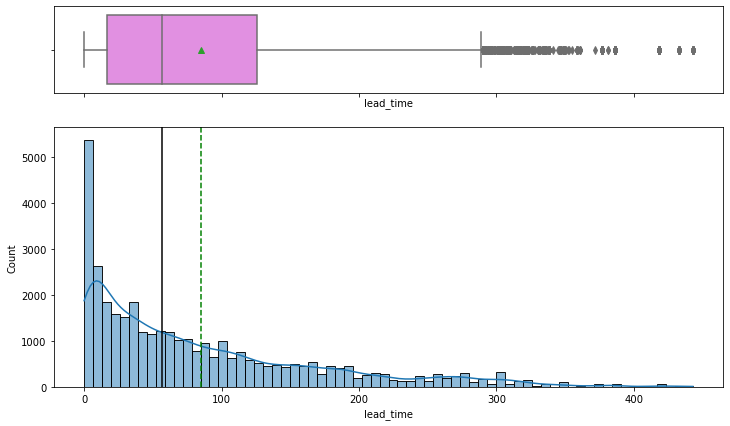

<IPython.core.display.Javascript object>

In [19]:
histo_box(data, "lead_time", kde=True)

#### Observations:
- The lead time distribution is heavily right skewed. The average lead time is 85 days, and half of the people book 57 days before arrival.
- Some lead times seem out of proportion and appear as outliers. But it is common in the industry to book as far as two years for some hotel resorts. Therefore, these lead times will not be treated as  outliers. 

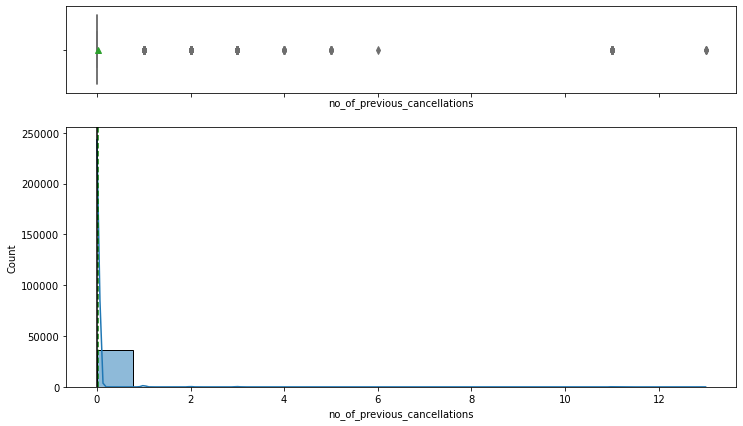

<IPython.core.display.Javascript object>

In [20]:
histo_box(data, "no_of_previous_cancellations", kde=True)

#### Observations:
- Previous cancellations occur most of the time once for an average of 0.023 times and a median of 0. Some guests previously cancel up to a maximum of 13 times This gives a heavily right skewed distribution.

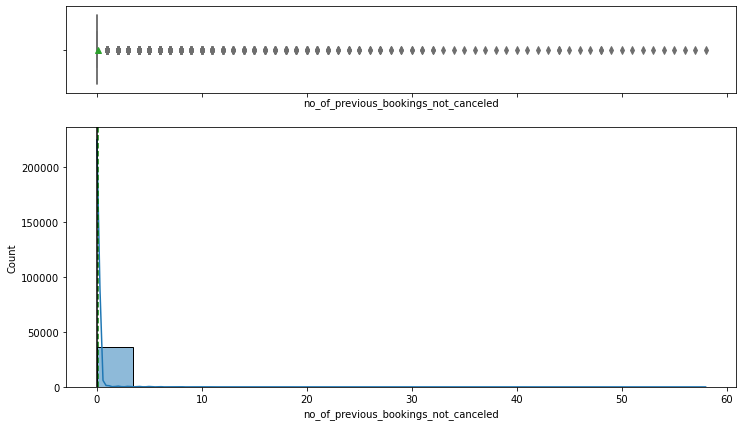

<IPython.core.display.Javascript object>

In [21]:
histo_box(data, "no_of_previous_bookings_not_canceled", kde=True)

#### Observations:
- The average number of times previous bookings were not canceled is 0.153. The maximum of bookings with no cancellations points to 58 times.

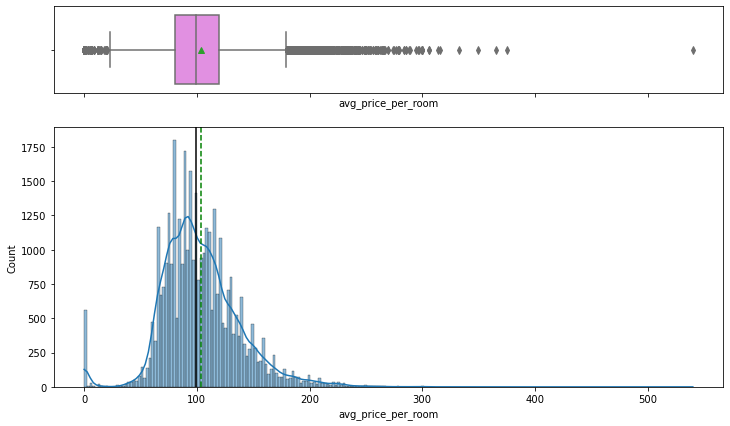

<IPython.core.display.Javascript object>

In [22]:
histo_box(data, "avg_price_per_room", kde=True)

#### Observations:
- The average price for a room is 103.42 euros for a median of 99.45 euros. With median and mean close, average price seems normally distributed. 
- The presence of outliers can be noticed with average price reaching 400 to 500 euros. These prices seem acceptable in the industry, especially for luxury resorts. We will not treat these prices that appear as outliers.

#### Univariate analysis with Barplot

In [23]:
# Defining a function to create labeled barplots
def mylabeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Discrete Variables

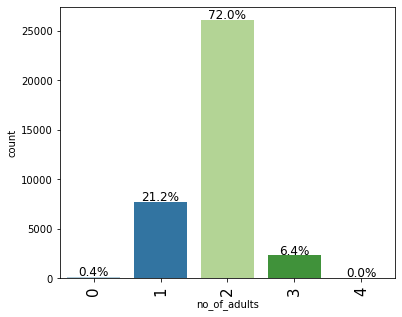

<IPython.core.display.Javascript object>

In [24]:
mylabeled_barplot(data, "no_of_adults", perc=True)

- The highest number of adults guests is 2. 1 and 3 guests follow the list.

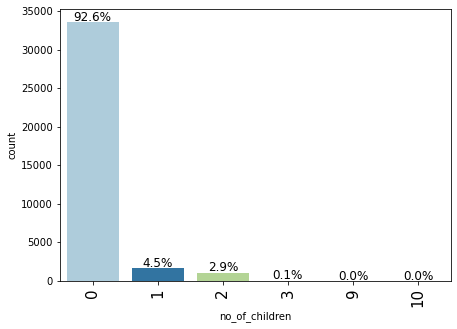

<IPython.core.display.Javascript object>

In [25]:
mylabeled_barplot(data, "no_of_children", perc=True)

- Most of the guests do not travel with children (92.6%). Those who do, travel with one, two or three. 

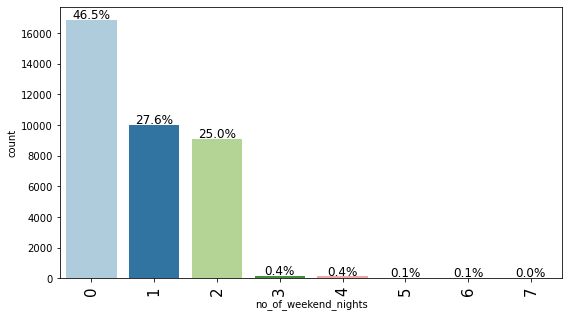

<IPython.core.display.Javascript object>

In [26]:
mylabeled_barplot(data, "no_of_weekend_nights", perc=True)

- Almost half of the guests usually do not stay on week-end nights. They must be mainly corporate workers. Week nights are 1 to 2 days long. Oftentimes 3 to 4 nights.

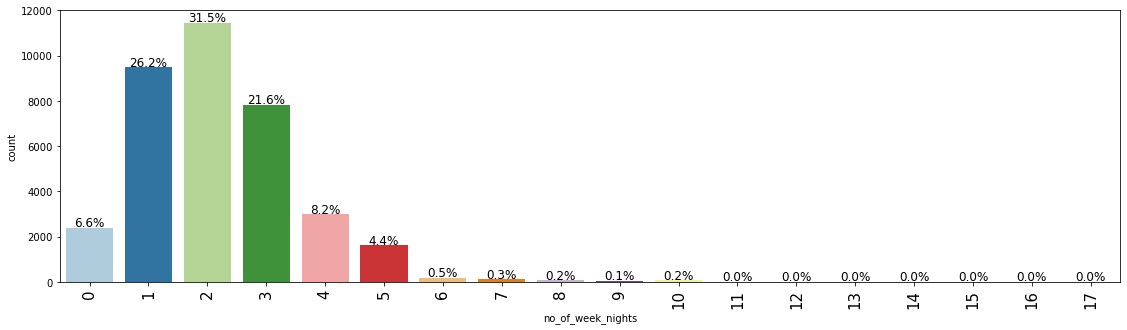

<IPython.core.display.Javascript object>

In [27]:
mylabeled_barplot(data, "no_of_week_nights", perc=True)

- Week nights reach their peak at 2 days, 1 day and 3 days. 6.6% do not spend the night at all.

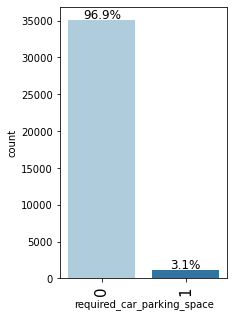

<IPython.core.display.Javascript object>

In [28]:
mylabeled_barplot(data, "required_car_parking_space", perc=True)

- The majority of guests (96.9%)do not require a car parking space as opposed to 3.1% who require one parking space.

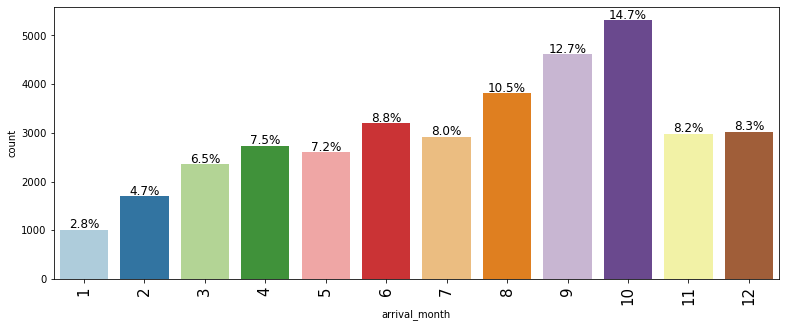

<IPython.core.display.Javascript object>

In [29]:
mylabeled_barplot(data, "arrival_month", perc=True)

- October (10) tops the list of the arrival month. It is followed by September, August, June, December and November. January is the lowest arrival month.

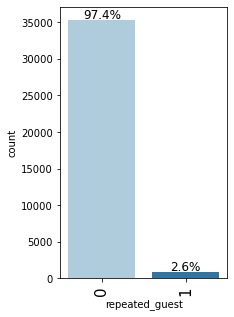

<IPython.core.display.Javascript object>

In [30]:
mylabeled_barplot(data, "repeated_guest", perc=True)

- 97.4% of the guests do not return to the hotel as opposed to 2.6%. This seems to be an issue.

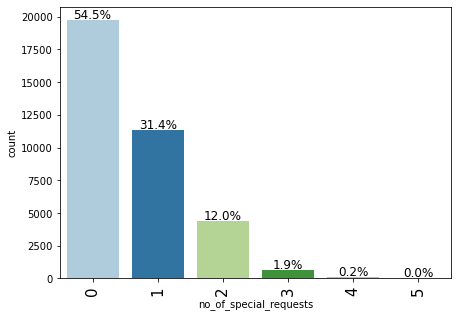

<IPython.core.display.Javascript object>

In [31]:
mylabeled_barplot(data, "no_of_special_requests", perc=True)

- Half of the guests do not require special requests. 31.4% have a request of type 1 and 12% of type 2. These 2 types make up half of the special requests.

#### Categorical Variables

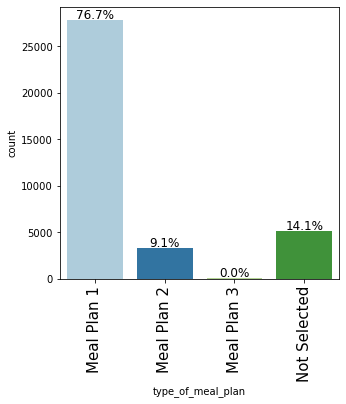

<IPython.core.display.Javascript object>

In [32]:
mylabeled_barplot(data, "type_of_meal_plan", perc=True)

- Meal Plan 1 is the preferred meal plan of guests. It points to 76.7%. 14.1 % of guests do not select one.

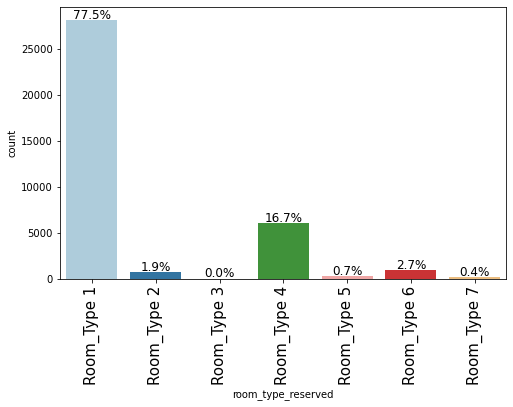

<IPython.core.display.Javascript object>

In [33]:
mylabeled_barplot(data, "room_type_reserved", perc=True)

- Room Type 1 is the most sought type of room. Second is room type 4. Room type 3 constitutes the least liked room type.

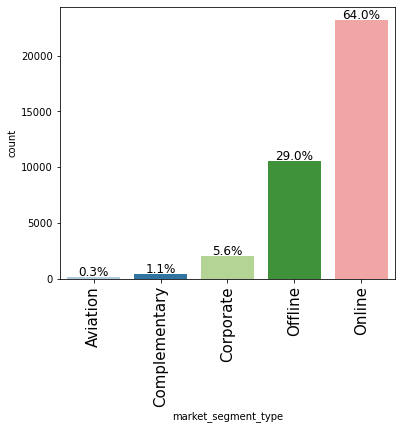

<IPython.core.display.Javascript object>

In [34]:
mylabeled_barplot(data, "market_segment_type", perc=True)

- Online  and Offline make up 93% of the market segment with online topping the list at 64%. Aviation being the lagging market segment.

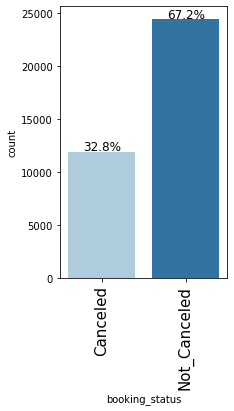

<IPython.core.display.Javascript object>

In [35]:
mylabeled_barplot(data, "booking_status", perc=True)

- 67.2% of bookings do not fall through as opposed to 32.8% who get canceled. Improvement is needed.

#### Bivariate Analysis

In [36]:
# Before checking for correlation between the variables, we will convert the dependent variable Canceled and Not Canceled classes
# to 1 and O to have numeric values.
data["booking_status"] = data["booking_status"].replace(
    ["Not_Canceled", "Canceled"], [0, 1]
)

<IPython.core.display.Javascript object>

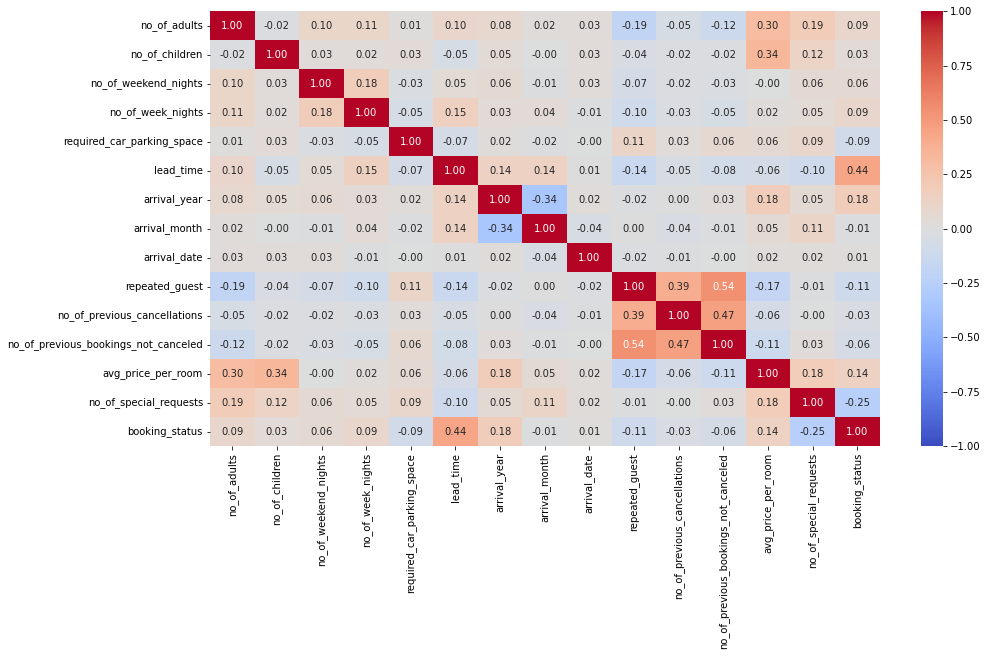

<IPython.core.display.Javascript object>

In [37]:
# let's check the correlations between the variable

plt.figure(figsize=(15, 8))
col_list = data.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(
    data[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)
plt.show()

- No of previous bookings not canceled and repeated guest show a positive correlation. It seems that the more we are a repeated guest, the more likely cancelation is not to occur.
- Booking status and lead time exhibit a slight correlation.
- Average price per room and number of adults and children show a slight correlation, respectively 30% and 34%.
- The other indepedent variables do not show significant correlation that deems analysis.

In [38]:
# Let's create a function to plot the category counts with a stacked bar chart

<IPython.core.display.Javascript object>

In [39]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


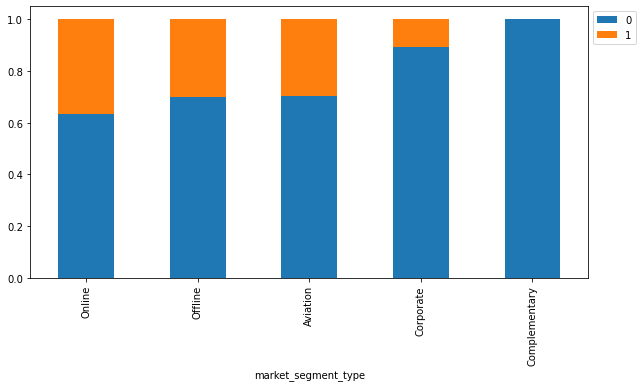

<IPython.core.display.Javascript object>

In [40]:
# Lets check for market segment type and booking status as we see a correlation of 0.44

stacked_barplot(data, "market_segment_type", "booking_status")
# stacked_barplot(data, "market_segment_type", "booking_status")

- Corporate guests stand out as the most loyal in booking. Their cancellation rates are the lowest as opposed to online , offline and Aviation that have slightly equal rate for cancellations. Complimentary guests do not cancel as these bookings are usually free or at a very low cost.

booking_status          0      1    All
room_type_reserved                     
All                 24390  11885  36275
Room_Type 1         19058   9072  28130
Room_Type 4          3988   2069   6057
Room_Type 6           560    406    966
Room_Type 2           464    228    692
Room_Type 5           193     72    265
Room_Type 7           122     36    158
Room_Type 3             5      2      7
------------------------------------------------------------------------------------------------------------------------


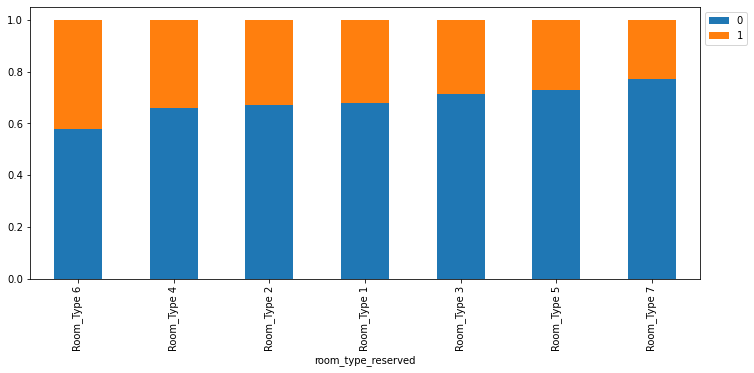

<IPython.core.display.Javascript object>

In [41]:
# Lets check for market segment type and booking status
stacked_barplot(data, "room_type_reserved", "booking_status")

 - Room types do not seem to impact booking's cancellations. Cancellation rates are equal across all types.

booking_status      0      1    All
no_of_children                     
All             24390  11885  36275
0               22695  10882  33577
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
9                   1      1      2
10                  1      0      1
------------------------------------------------------------------------------------------------------------------------


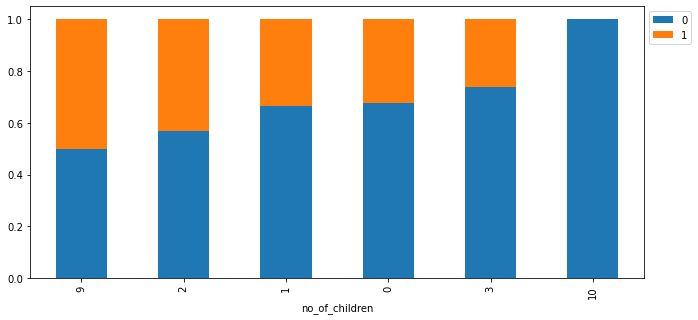

<IPython.core.display.Javascript object>

In [42]:
# Lets check for number of children and booking status.
stacked_barplot(data, "no_of_children", "booking_status")

- The number of children does not seem to trigger bookings's cancellations. 
- Cancellation seems to occur at the same rate despite the number of children.

booking_status      0      1    All
no_of_adults                       
All             24390  11885  36275
2               16989   9119  26108
1                5839   1856   7695
3                1454    863   2317
0                  95     44    139
4                  13      3     16
------------------------------------------------------------------------------------------------------------------------


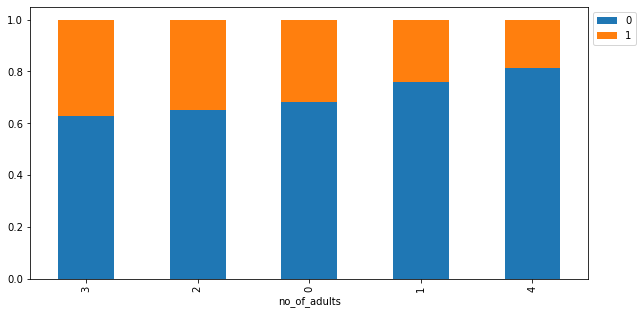

<IPython.core.display.Javascript object>

In [43]:
# Lets check for number of adults and booking status.
stacked_barplot(data, "no_of_adults", "booking_status")

- Likewsise for children, adult's cancellation rate follows the slightly same rate despite the number of cancellations. Whether 1,2 or 3 adults does not seem to impact much the cancellation rate.

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


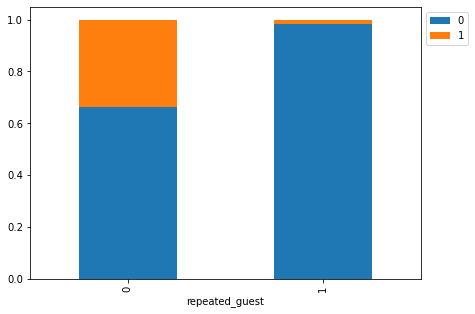

<IPython.core.display.Javascript object>

In [44]:
# lets check for repeated guests  and booking status.
stacked_barplot(data, "repeated_guest", "booking_status")

- Cancellations is highest with one time guests. Repeated guests'cancellation rate is very low.

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


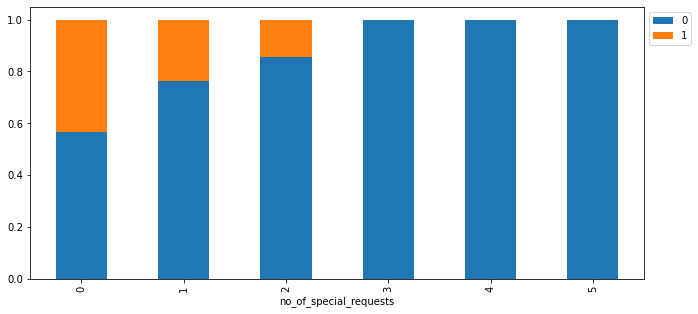

<IPython.core.display.Javascript object>

In [45]:
# Lets check for special requests and booking status.
stacked_barplot(data, "no_of_special_requests", "booking_status")

- Cancellations occurs with special requests 0, 1 and 2. Special requests 3, 4 and 5 do not experience cancellations. This is worth investigating.

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


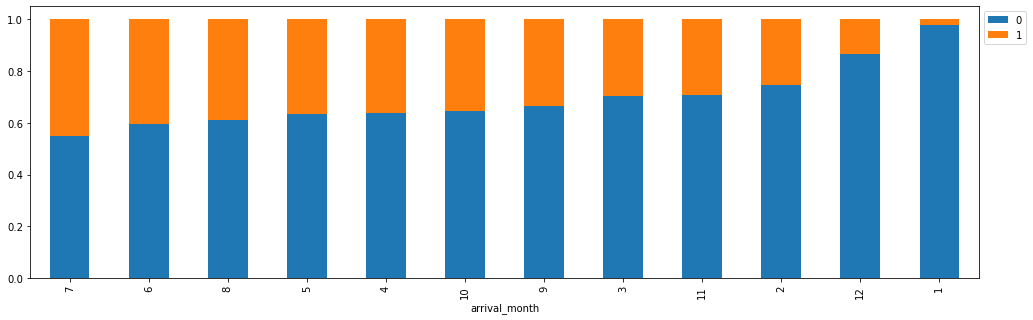

<IPython.core.display.Javascript object>

In [46]:
# Lets check for arrival month and booking status.
stacked_barplot(data, "arrival_month", "booking_status")

- Cancellation is about the same across all arival months, except in month 12(December) and month 1 (January). This can be explained by guests's end of year vacation plans.

booking_status            0      1    All
no_of_weekend_nights                     
All                   24390  11885  36275
0                     11779   5093  16872
1                      6563   3432   9995
2                      5914   3157   9071
4                        46     83    129
3                        79     74    153
5                         5     29     34
6                         4     16     20
7                         0      1      1
------------------------------------------------------------------------------------------------------------------------


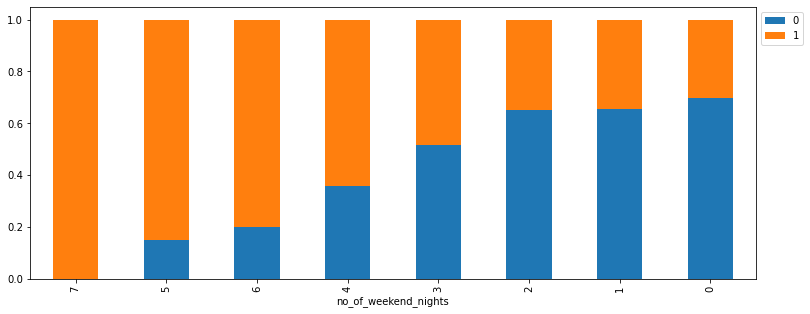

<IPython.core.display.Javascript object>

In [47]:
# Lets check for no of weekend nights and booking status.
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

- The higher the number of weekend nights, the more likely a cancellation is to occur. The cancellation seems to follow an uptrend as the number of weekends  increases. From no (0) weekend nights to two (2) weekend nights the cancellation rate seems to stabilize.

booking_status         0      1    All
no_of_week_nights                     
All                24390  11885  36275
2                   7447   3997  11444
3                   5265   2574   7839
1                   6916   2572   9488
4                   1847   1143   2990
0                   1708    679   2387
5                    982    632   1614
6                    101     88    189
10                     9     53     62
7                     61     52    113
8                     30     32     62
9                     13     21     34
11                     3     14     17
15                     2      8     10
12                     2      7      9
13                     0      5      5
14                     3      4      7
16                     0      2      2
17                     1      2      3
------------------------------------------------------------------------------------------------------------------------


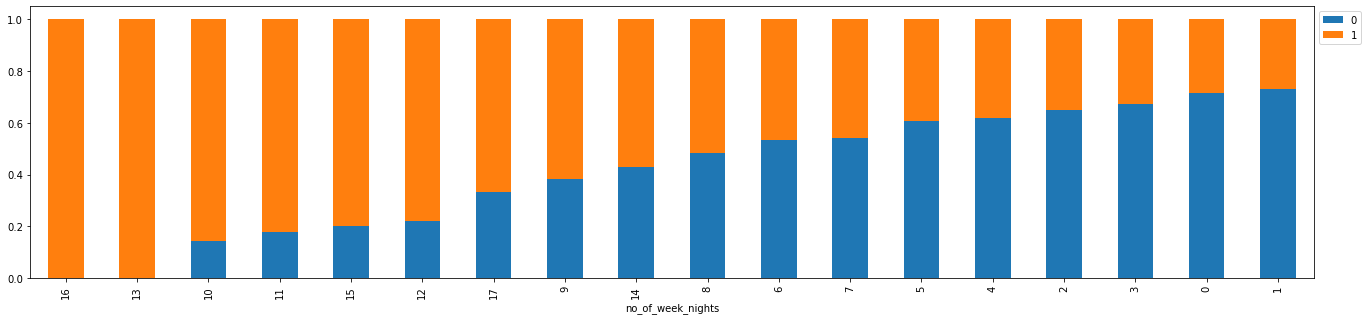

<IPython.core.display.Javascript object>

In [48]:
# Lets check for no of week nights and booking status.
stacked_barplot(data, "no_of_week_nights", "booking_status")

- The higher the number of week nights, the higher the number of cancellations. Cancellation and week nights seem to follow a linear trend.

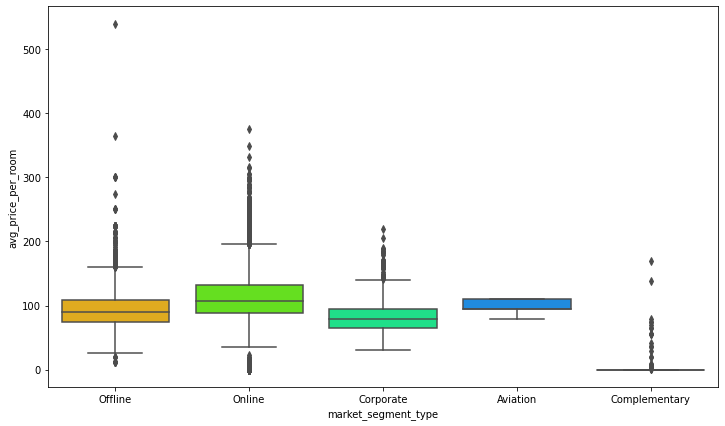

<IPython.core.display.Javascript object>

In [49]:
# lets check for market segment type and average price per room
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- The maximum average price for a room is about 200 euros , and mainly for online bookings. 
- The median price is higher for online bookings than for other market segment types.
- 75% of online guests pay around 120 euros more than any other market type.

In [ ]:
## Function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [1]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

NameError: name 'distribution_plot_wrt_target' is not defined

- The longer the lead time, the more likely the cancellation to occur.
- 75% of the guests who cancel have a lead time of about 200 days as opposed to less than 100 days for those who do not cancel.

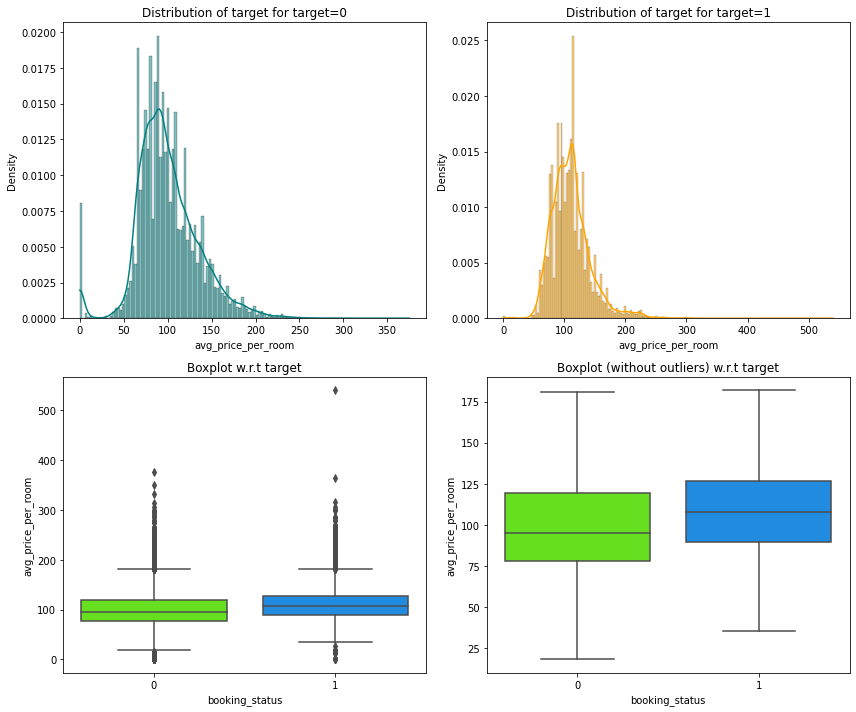

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

- Median Average price per room is higher for guests who canceled.  75% of guests who canceled have higher average room price as opposed to those who do not canceled. 

In [53]:
# Bookings group by arrival months
monthly_arrival_booking = data.groupby(["arrival_month"])["booking_status"].count()

# Creating a dataframe with months and count of customers in each month
monthly_arrival_booking = pd.DataFrame(
    {
        "Month": list(monthly_arrival_booking.index),
        "Guests": list(monthly_arrival_booking.values),
    }
)
monthly_arrival_booking

,Month,Guests
0,1,1014
1,2,1704
2,3,2358
3,4,2736
4,5,2598
5,6,3203
6,7,2920
7,8,3813
8,9,4611
9,10,5317


<IPython.core.display.Javascript object>

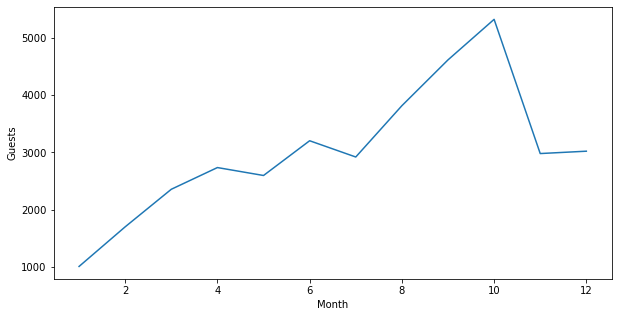

<IPython.core.display.Javascript object>

In [54]:
# Plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_arrival_booking, x="Month", y="Guests")
plt.show()

- From Februray (2) to October (10), we notice a spike in the arrivals with a peak in October. From October to December, arrivals decline to stabilize in December.

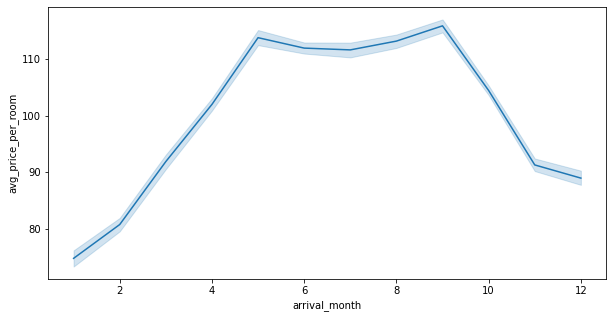

<IPython.core.display.Javascript object>

In [55]:
# Plotting the average room prive over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room")
plt.show()

- Average price per room follows an uptrend from February to May. From May to late Septembre, prices stabilize and start declining in October.

## Building a Logistic Regression model

### Data Preparation for modeling

#### Model Evaluation Criterion

- The model can wrongfully make predictions. For instance:
 - Predict that a guest will cancel their booking when in fact he or she will not. In that instance, the hotel may miss an opportunity to provide good customer service and this can be harmful to the brand.
 - Predict that a guest will not cancel their booking but in fact he or she will cancel. This triggers ressource losses.
 
 
 First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [56]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold

    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [57]:
# Defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [58]:
# Dropping booking status the dependent variable
X = data.drop(["booking_status"], axis=1)

# Defining the dependent variable
Y = data["booking_status"]

# Creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
# Adding constant
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [59]:
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [60]:
# Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [61]:
# Defining and fitting the logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))

# Fitting the logistic regression model and setting dispense to True to display the information on the number of iterations
lg = logit.fit(disp=False)

# Printing the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.3293
Time:                        21:01:56   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

<IPython.core.display.Javascript object>

#### Observations:
- Negative values of the coefficients demonstrate that a probability of a guest cancelling their reservations decreases with the increase of the corresponding attribute value. For instance:
  - A Booking's cancellation decreases as a guests is frequent (repeated guest). We have seen earlier in our bivariate analysis.
  - As the number of special requests increases, the number of cancellation decreases.
  - The required car parking space is also a factor that decreases booking cancellation as it becomes available.
  
  
- An independent variable with a  pvalue greater than 0.05 is considered non significant for the model. However, when it is less than 0.05, it is considered significant and requires attention.

- Checking and removing multicollinearity are key to coefficient and pvalue's reliability. 

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [62]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

<IPython.core.display.Javascript object>

#### Observations:
- We notice that market segment variables(online, offline and corporate) have high multicollinearity. These variables have VIFs greater than 10 respectively. We will drop them one by one.

In [63]:
# Removing the multicollinearity by dropping market segment online
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
required_car_parking_space                    1.03979
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
repeated_guest                                1.78019
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

<IPython.core.display.Javascript object>

- Dropping online market segment type results in removing multicollinearity. No multicollinearity can be noticed.
- Moving to removing p values greater than 0.05

### Removing High P values

In [64]:
# Let's remove the high p values
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [65]:
X_train2 = X_train1[selected_features]

<IPython.core.display.Javascript object>

In [66]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=True)

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 03 Jun 2022   Pseudo R-squ.:                  0.3283
Time:                        21:02:03   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

<IPython.core.display.Javascript object>

#### Observations:
- P values greater than 0.05 are removed. Coefficients are reliable.
- No feature has p-value greater than 0.05, therefore we'll consider the features in X_train2 as the final ones and lg2 as final model.

### Converting coefficients to odds

- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 

In [67]:
# Converting coefficients to odds
odds = np.exp(lg2.params)

# Finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


<IPython.core.display.Javascript object>

#### Observations:

- Holding other features constant, a one unit change in  car parking space, for instance, will decrease the odds of a guest cancelling by 0.20 times or a 79% decrease in booking's cancellations.
- Likewise for repeated guest where a one unit change in repeated guest will decrease the odds of booking's cancellation by 0.06 times or 93.5 %. A guest who is regular is less likely to cancel their booking than a non regular one. The higher the number of bookings , the lesser the number of cancellations. 
- The same conclusion can be made for number of special requests, arrival month, room type, market, corporate and offline market segment types.
- Overall, these features with negative coefficients seem to have a greater impact in the odds of cancelling or not bookings and need to be watched out.

#### Checking model performance on the Training set

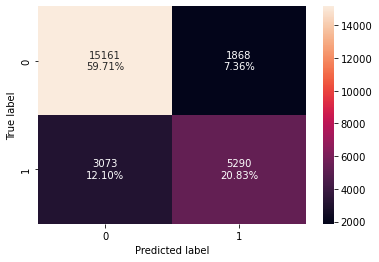

<IPython.core.display.Javascript object>

In [68]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [69]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


<IPython.core.display.Javascript object>

- The training model has a recall of 0.63. We will try to improve by pursuing further analysis.

#### ROC-AUC 

- Let's use the area under the curve on the training set

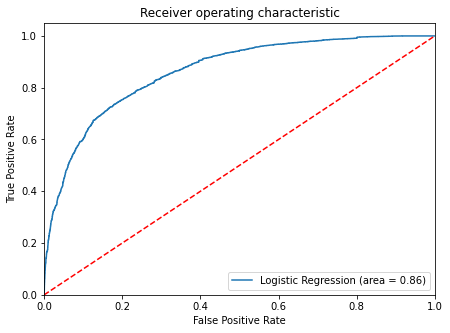

<IPython.core.display.Javascript object>

In [70]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Let's see if we can improve the area under the curve. The larger the area under the curve, the better the model.

### Model Performance Improvement    

- Let's improve the model threshold originally set at 0.5 by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890665


<IPython.core.display.Javascript object>

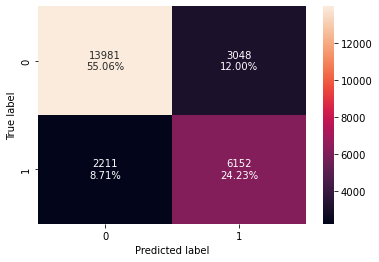

<IPython.core.display.Javascript object>

In [72]:
# Creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [73]:
# Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


<IPython.core.display.Javascript object>

- Recall has improved from 0.63 to 0.73. F1 has improved as well going from 0.68 to 0.70. However, precision has decreased.
- Lowering the threshold increases recall. As threshold goes from 0.5 to 0.37, recall improvement can be expected.

#### Precision-Recall Curve 

- We will try to find a better treshold and use the precision recall curve

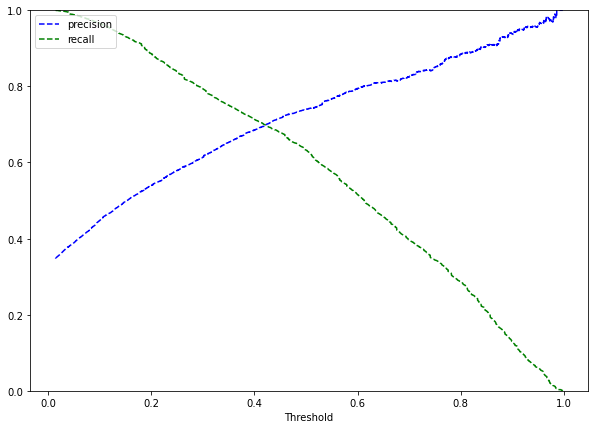

<IPython.core.display.Javascript object>

In [74]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At 0.42 threshold, we get balanced recall and precision.

In [75]:
# Let'set the newly found threshold curve
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

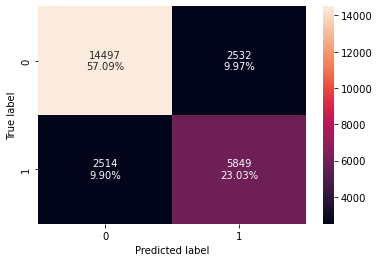

<IPython.core.display.Javascript object>

In [76]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [77]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69939,0.69789,0.69864


<IPython.core.display.Javascript object>

- We noticed that at optimal threshold 0.42, recall and F1 have decreased. However, precision has slightly improved

#### Training performance evaluation

In [78]:
# training performance comparison on the different

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


<IPython.core.display.Javascript object>

### Checking model performance on test  set

In [79]:
X_test2 = X_test[list(X_train2.columns)]

<IPython.core.display.Javascript object>

**Using model with default threshold**

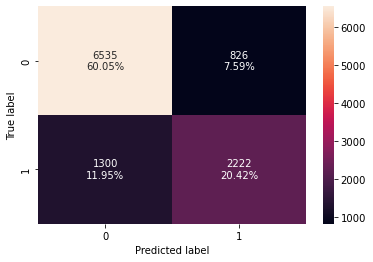

<IPython.core.display.Javascript object>

In [80]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [81]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


<IPython.core.display.Javascript object>

- Recall is about the same as for the training set 0.63. Precision is a little bit lower 0.72 as opposed to 0.73. F1 follows the same trend as well.

ROC Curve on test set

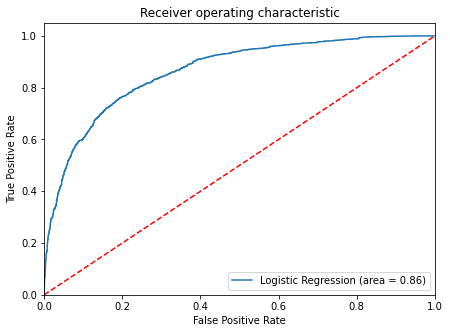

<IPython.core.display.Javascript object>

In [82]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using model with threshold =0.37

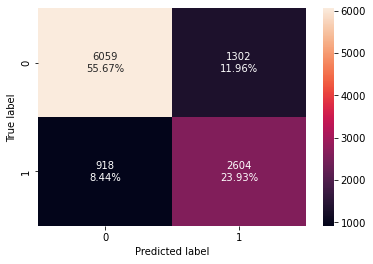

<IPython.core.display.Javascript object>

In [83]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [84]:
# Checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


<IPython.core.display.Javascript object>

- Recall improves to 0.73 as opposed to 0.63 with the default threshold. However, precision decreaes. This is expected. A decrease in threshold triggers an increase in recall.

#### Using model with threshold =0.42

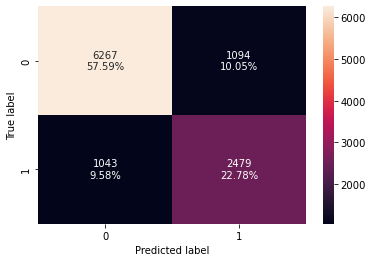

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [86]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


<IPython.core.display.Javascript object>

- Recall slightly decreases as threshold increases from 0.37 to 0.42. Likewise for f1 score. Conversely, precision increases.

## Final Model Summary

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


<IPython.core.display.Javascript object>

In [88]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80364
Recall,0.63089,0.73935,0.70386
Precision,0.72900,0.66667,0.69381
F1,0.67641,0.70113,0.69880


<IPython.core.display.Javascript object>

### Conclusion
* We have been able to build a predictive model that can be used by the hotel to find guests that are likely to cancel their bookings with an F1 score of 0.70 on the training set
* The 0.37 threshold  model yields the highest recall 0.739 and the highest f1 score 0.70113 on the test set.

* All the logistic regression models have given a generalized performance on the training and test set.

 Based on all the findings, we recommend the following for the hotel:
 
- Implement policies that encourage more parking space.
- Fulfill special requests to lower booking's cancellations. The higher the number of met special requests, the greater are the odds for a guest to honor their bookings.
- Provide rewards or incentives for guests to come back such as first free nights or big discounts to encourage loyality It has been noticed that the more a guest comes back, the lesser his or her chances  to cancel their bookings.
- Furnish more sought room types, for instance, room type7. The more a room fits a guest's needs or requests, the less likely he or she is to cancel their bookings. Room type 7 seems provides the least amount of cancellations even though room type 1 is the most popular. The hotel might try to offer more availability for that room type to increase the likelihood of having guests honoring their bookings.
- Offer more complementary stays to corporate , aviation and offline customers which usually results from the number of bookings reaching a defined threshold.
- Provide more room availability, especially during the busiest arrival months. October, September, August, June and December.


## Building a Decision Tree model

### Data Preparation for Modeling

In [89]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [90]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model Building

#### Decision Tree (default)

- Before building the model, we will create two functions:
 - Function 1 will check the performance of the model by computing different metrics.
 - Function 2 will plot the confusion matrix.

In [91]:
# Defining a function checking the performance model computing different metrics leveraging sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [92]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [93]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking the performance model on the training set

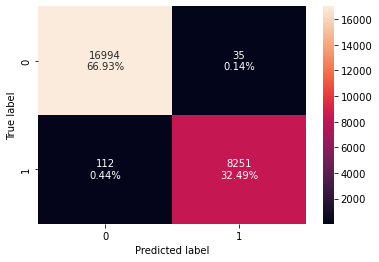

<IPython.core.display.Javascript object>

In [94]:
confusion_matrix_sklearn(model, X_train, y_train)

In [95]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

#### Checking the performance model on the test set

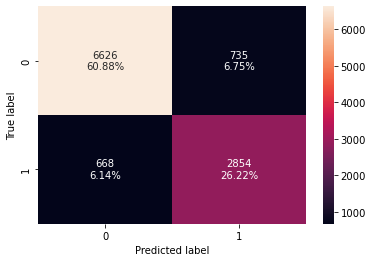

<IPython.core.display.Javascript object>

In [96]:
confusion_matrix_sklearn(model, X_test, y_test)

In [97]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87108,0.81034,0.79521,0.80270


<IPython.core.display.Javascript object>

### Do we need to prune the tree?

- The model almost perfectly classifies the data points on the training set. Recall slides from 0.98 in training to 0.81 in testing. Likewise precision goes from 0.99 to 0.79 and so on.
- A decision tree will continue to grow and classify each data point correctly if no limits are set as the trees will learn all the patterns in the training set.
- Overfitting results in the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.
- Pruning is needed to reduce the overfitting.


#### Checking for important model features before pruning

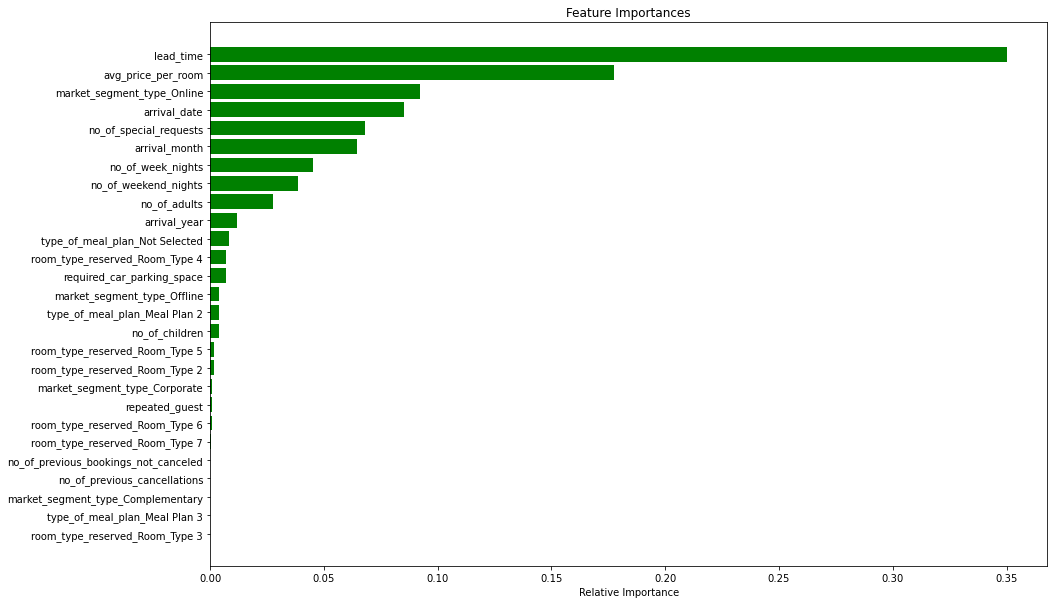

<IPython.core.display.Javascript object>

In [98]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- We can notice that lead time, average price per room, online market type, arrival date and the number of special requests make the top 5 features in the decision tree performance model.

### Pre-Pruning

In [99]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking the performance model on the training set

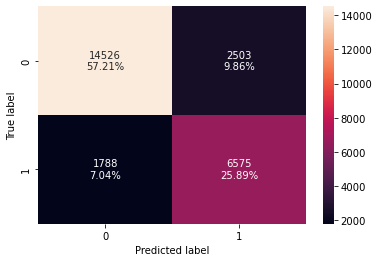

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [101]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


<IPython.core.display.Javascript object>

#### Checking the performance model on the test set

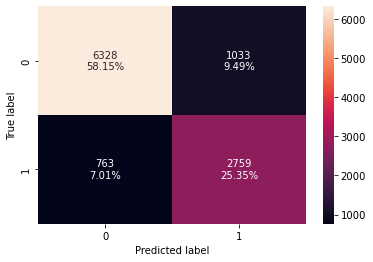

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [103]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


<IPython.core.display.Javascript object>

* The model gives a generalized result since all metrics on both the train and test data come to the same. This shows that the model is able to generalize well on unseen data.

#### Visualizing the Decision Tree

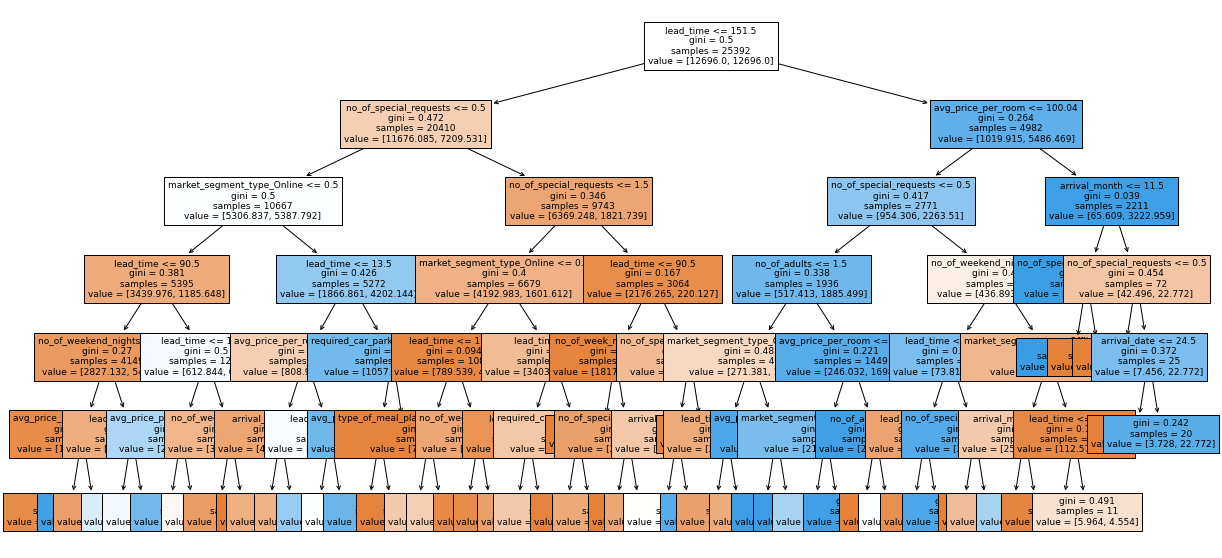

<IPython.core.display.Javascript object>

In [104]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [105]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

**Observations**
- if lead time is less than or equal to 151.50 days, the number of special requests less than or equal to 0.5, the online market segment type less than or equal to 0.5, and the lead time again less than or equal to 90.5, the number of weekend nights less than or equal to 0.5 coupled with an average room price less than or equal to 196.5 euros, the guest is not likely to cancel. However, if the average price is more than 196.5 euros, he is likely to cancel.

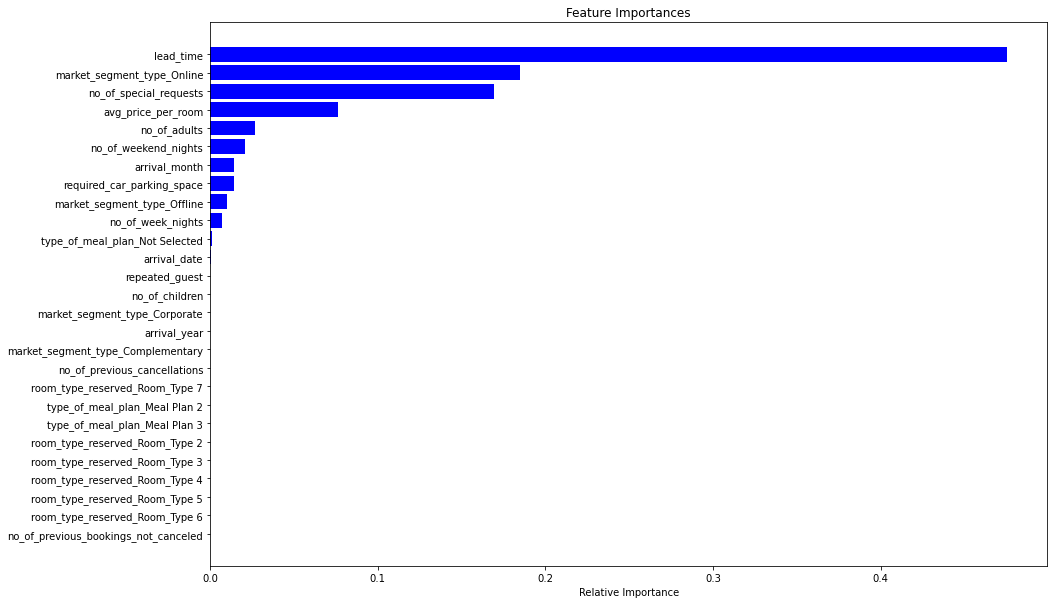

<IPython.core.display.Javascript object>

In [106]:
# Importance of features in the tree building after pre pruning

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
- The most important features by higher relative importance are lead time, online market segment type, the number of special requests, the average price per room, the number of adults, the number of weekend nights, the arrival month, the required car parking space, the offline market segment type and finally the number of week nights.
- Average price per room that was the second highest important feature is bumped to the fourth highest feature.
- Arrival date that was the fourth highest important feature in the previous model no longer appears as an important one.

### Post Pruning

Quoting notes from lectures quoted from scikit-learn.org 

"The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores."

**Total impurity of leaves vs effective alphas of pruned tree**

"Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves."

#### Cost Complexity Pruning

In [107]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [108]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1917,0.00890,0.32806
1918,0.00980,0.33786
1919,0.01272,0.35058
1920,0.03412,0.41882


<IPython.core.display.Javascript object>

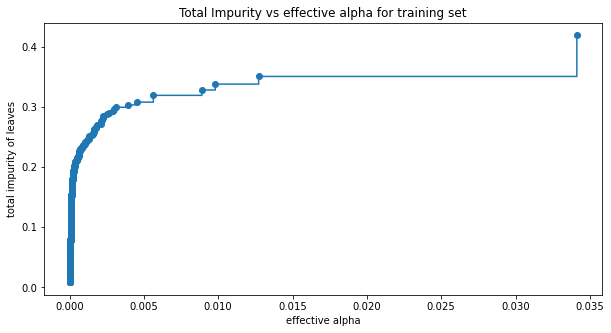

<IPython.core.display.Javascript object>

In [109]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- The next step is to train a decision tree using effective alphas. The last valuein ``ccp_alphas`` (0.081) is the alpha value that prunes the whole tree, leaving the tree, ``clfs[-1]`, with one node.

In [110]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


<IPython.core.display.Javascript object>

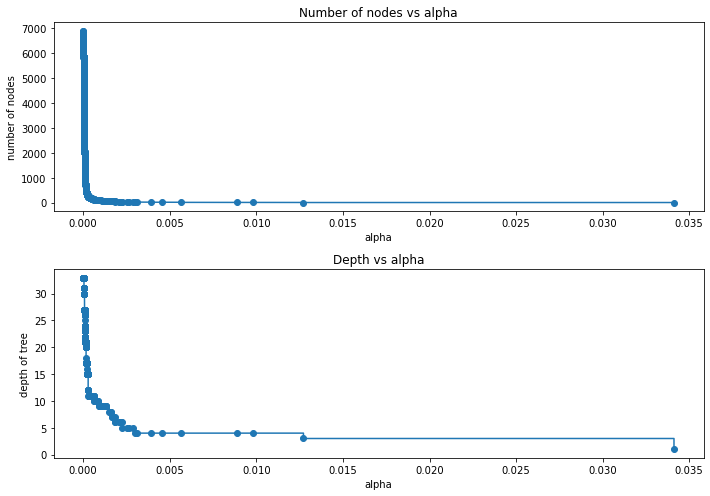

<IPython.core.display.Javascript object>

In [111]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [112]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

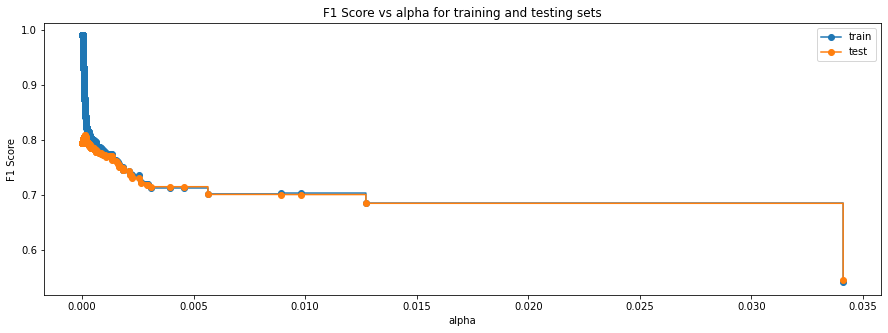

<IPython.core.display.Javascript object>

In [113]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. As seen in the graph, setting ccp_alpha at around 0.0001 maximizes the F1 score.

In [114]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167037,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

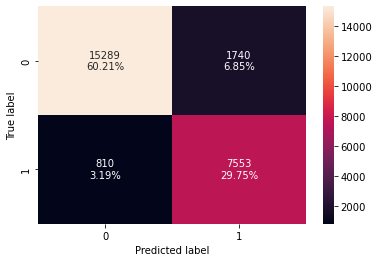

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [116]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89957,0.90314,0.81276,0.85557


<IPython.core.display.Javascript object>

#### Checking performance on test set

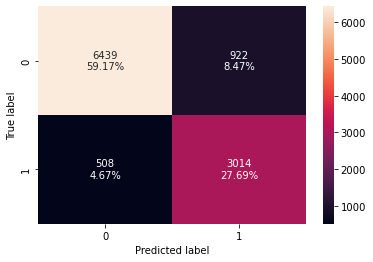

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [118]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86860,0.85576,0.76575,0.80826


<IPython.core.display.Javascript object>

**Observations**
- Post-pruning produces a generalized and good  model performance on both training and test set.
- The f1 score has improved.

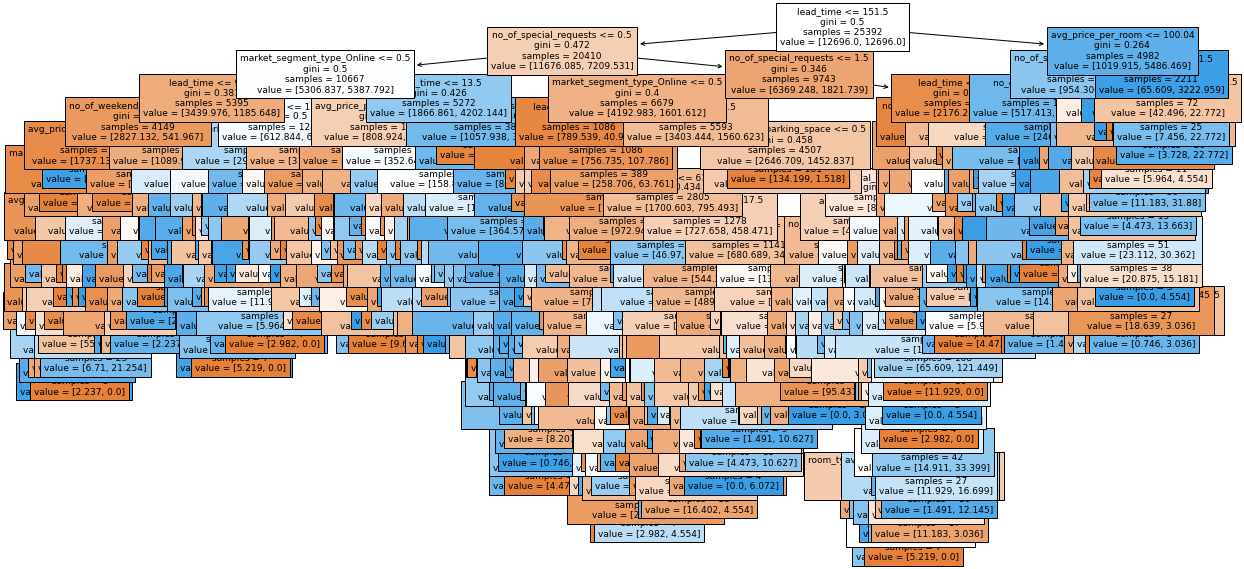

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

- The below scenario leads to a solid booking:
 - lead_time <= 151.50
 - no_of_special_requests <= 0.50
 - market_segment_type_Online <= 0.50
 - lead_time <= 90.50
 - no_of_weekend_nights <= 0.50
 - avg_price_per_room <= 196.50
 - market_segment_type_Offline <= 0.50
 - lead_time <= 16.50
 - avg_price_per_room <= 68.50
 - lead to class: 0 : no cancellation



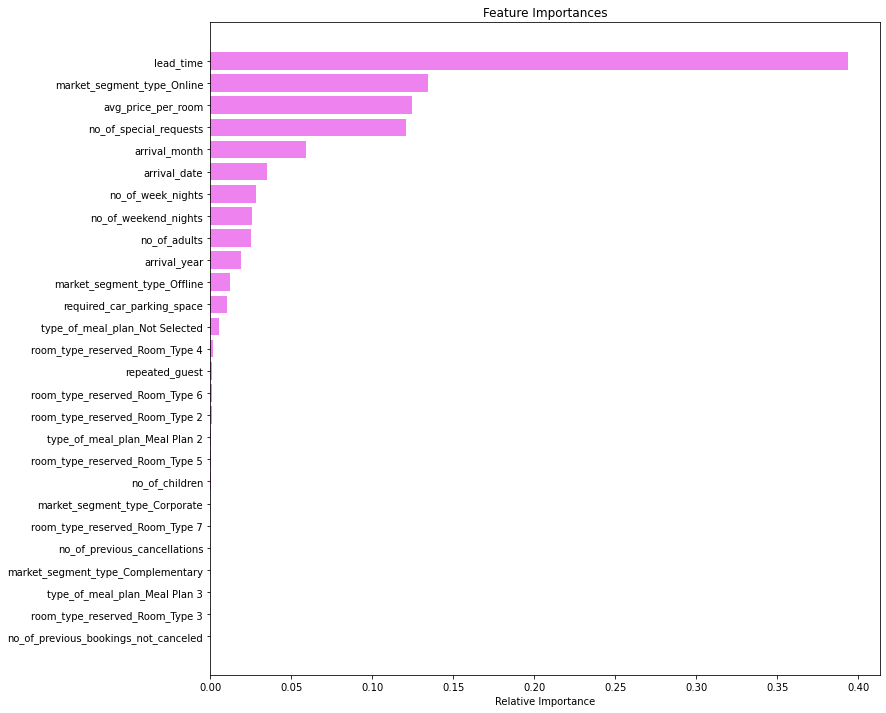

<IPython.core.display.Javascript object>

In [121]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Lead time, online market segment type, average price per room, number of special requests, and arrival month are the most important features in the best model.

## Model Performance Comparison and Conclusions

In [122]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83101,0.89957
Recall,0.98661,0.78620,0.90314
Precision,0.99578,0.72428,0.81276
F1,0.99117,0.75397,0.85557


<IPython.core.display.Javascript object>

In [123]:
# Test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87108,0.83497,0.86860
Recall,0.81034,0.78336,0.85576
Precision,0.79521,0.72758,0.76575
F1,0.80270,0.75444,0.80826


<IPython.core.display.Javascript object>

### Conclusion:

* We have been able to build a predictive model that can be used by the hotel to find guests that are likely to cancel their bookings with an F1 score of 0.85 on the training set.

* All the logistic regression models have given a generalized performance on the training and test set.

* The post pruning model yields the highest F1 score on the test set (0.80826) sliglty higher than in the decision tree model, and therefore should be the model we recommend.

- We recommend that the hotel focus on the most important features that are lead time, online market type, average room price.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

- We compare two models leveraging two techniques: logistic regression and decison tree. Both models yield different metrics.
 - Logistic regression, at a 0.37 threshold, provides the highest recall and f1 score on the test set. Important features that can trigger cancellations include car parking space, repeated guest, arrival month, room type, market, corporate and offline market segment types.
 - The post pruning model, on the othe hand, provides the best decision tree model with the highest f1 score on the test set. Unlike the logistic regression model, the most important features that consistently come up in the decision tree model are lead time and online market type, as well as average room price. These conclusions seem to validate the EDA fact findings.
- The decision tree stands out as a better model. The logistics model finds that holding other features constant, a one unit change in car parking space decreases the odds of a guest cancelling by 0.20 times or a 79% decrease in booking's cancellations. Required parking space appears as a big factor in cancellation's decision.Conversely, other factors, for instance, lead time and online market type, remain more important in the decision tree model. Therefore, we recommend its adoption by the hotel management.
- The hotel management can leverage some actionable policies, and we recommend the following:
  - Management of cancellation policies. Revisit cancellation policies, target specific booking windows or time periods that have high cancellation rates.
  - Consider offering non refundable rates.To appeal to more guests, offer both non-refundable and flexible rates. Guests who make non-refundable reservations are generally more committed to their stays because they'll have to pay if they cancel, make changes, or no-show.
  - Accept multiple payment methods. Let guests use alternative payment methods like PayPal. This will help the hotel reach more bookers, reduce cancellations, and save time on administrative tasks.
  - Validate guest payment in advance. Between the time of booking and arrival, choose to pre-authorize guests’ credit cards (i.e. hold a small amount on their cards). Hotel confirms that the details remain correct and the card isn’t lost or stolen. It also helps the hotel avoid unchargeable cancellations.
  - Manage restrictions. Leveraging cancellation patterns, the hotel may want to use restrictions to prevent certain types of bookings and lost revenue. For example, the hotel may want to avoid  longer lead times, since those guests’ plans are more likely to change and result in cancellations as we have seen in the exploratory data analysis (EDA) . Setting a maximum lead time restriction can help prevent such situation.
  - Offer compelling prices. Guests might cancel if they find a comparable room for a better price at a different property or the same room for a cheaper price on a different website. This finding is confirmed by our EDA which demonstrates that online market type has the highest cancellation rate.

